In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
import os

# P123 20190224 133916 飞机123的一次试飞

# 数据去掉时间，武器重量

In [2]:
# get data, drop last NAN column, extract first two raws.
columnName = ["时间","全机油量","武器重量","马赫数","气压高度","校准空速","真空速","升降速度","攻角","侧滑角","动压","法向过载","侧向过载","轴向过载","俯仰角","滚转角","航向角","滚转速率","俯仰速率","偏航速率","左鸭翼","右鸭翼","左前襟","右前襟","左外副翼","右外副翼","左内副翼","右内副翼","左方向舵","右方向舵","机翼剪力","机翼弯矩","鸭翼剪力","垂尾剪力","鸭翼弯矩","机身弯矩",'None']
data = pd.read_table('../../data/P123_20190224_133916.dat', sep=' ', encoding='utf-8',names=columnName)
data = data.drop(["时间", 'None'], axis=1)
# feature data
data = data.drop(index=[0,1]).reset_index(drop=True)
# 去掉武器重量
data = data.drop(["武器重量"], axis=1)

In [3]:
data.head()

,全机油量,马赫数,气压高度,校准空速,真空速,升降速度,攻角,侧滑角,动压,法向过载,侧向过载,轴向过载,俯仰角,滚转角,航向角,滚转速率,俯仰速率,偏航速率,左鸭翼,右鸭翼,左前襟,右前襟,左外副翼,右外副翼,左内副翼,右内副翼,左方向舵,右方向舵,机翼剪力,机翼弯矩,鸭翼剪力,垂尾剪力,鸭翼弯矩,机身弯矩
0,1.712293,-2.034701,-2.458565,-1.654750,-2.002497,0.025670,0.820762,-1.005297,-1.306828,-0.371522,0.343728,2.553419,0.351094,0.027974,0.869308,0.213230,0.472986,0.228073,4.947509,4.940747,0.790944,0.784288,2.553953,2.759143,2.538070,2.771556,-1.149709,1.044148,-1.291510,0.892240,0.261481,1.230360,-0.691771,4.094313
1,1.712293,-2.034701,-2.458565,-1.646469,-1.996995,0.028309,0.857247,-0.839665,-1.304530,-0.594027,0.684582,2.553725,0.368481,0.029199,0.869487,0.160422,0.460895,0.239755,4.950694,4.958051,0.840452,0.833561,2.591646,2.755365,2.561883,2.763200,-1.189388,1.059722,-1.335063,0.761625,0.335940,-0.277523,0.359054,3.873393
2,1.711636,-2.034701,-2.458565,-1.648083,-1.991643,0.030013,0.891324,-0.899867,-1.300961,-0.421563,0.691267,2.517182,0.384545,0.029796,0.869640,0.135555,0.429068,0.259745,4.941473,4.949601,0.868210,0.863330,2.598304,2.761252,2.581077,2.765272,-1.189797,1.034744,-1.213312,0.788472,0.539627,-0.534792,1.002056,3.720319
3,1.710376,-2.034701,-2.458565,-1.643375,-1.985215,0.032856,0.932104,-1.112630,-1.294765,-0.515688,0.816702,2.516402,0.401023,0.030457,0.869846,0.127990,0.500233,0.255239,4.896569,4.900046,0.895341,0.892378,2.676272,2.902304,2.650020,2.893138,-1.052211,1.130507,-0.919787,0.899053,0.495633,0.160559,0.422761,4.098779
4,1.709745,-2.034701,-2.457952,-1.639023,-1.985008,0.033524,1.009953,-1.507243,-1.299273,-0.400387,0.771481,2.521734,0.417811,0.031403,0.870025,0.125469,0.494171,0.254724,4.765528,4.773487,0.925549,0.916342,2.822709,3.159169,2.799832,3.151294,-0.904923,1.247632,-0.938306,0.874178,0.455232,-3.330808,0.884475,2.670593


# 特征相关性

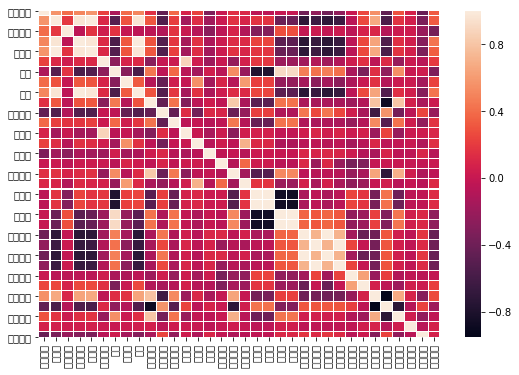

In [5]:
# spearman 相关系数 
corr=data.corr(method='spearman')
f, ax= plt.subplots(figsize = (9, 6))
sns.heatmap(corr, linewidths = 0.05, ax = ax)
plt.savefig('features_corr_spearman.png',dpi=300)

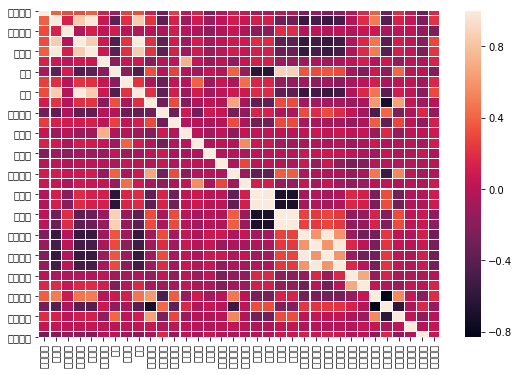

In [6]:
corr=data.corr(method='kendall')
f, ax= plt.subplots(figsize = (9, 6))
sns.heatmap(corr, linewidths = 0.05, ax = ax)
plt.savefig('features_corr_kendall.png',dpi=300)

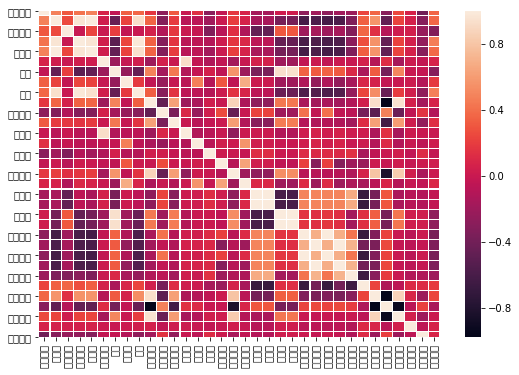

In [7]:
corr=data.corr(method='pearson')
f, ax= plt.subplots(figsize = (9, 6))
sns.heatmap(corr, linewidths = 0.05, ax = ax)
plt.savefig('features_corr_pearson.png',dpi=300)

# 时间纵向PCA 34维->1,2,3维

[9.09587376e+00 6.41978370e+00 3.86991784e+00 2.55212772e+00
 2.04920314e+00 1.83972227e+00 1.53788821e+00 1.03333868e+00
 9.45970915e-01 8.28446926e-01 6.11982864e-01 5.69147182e-01
 4.94198372e-01 4.59534176e-01 4.08803745e-01 3.22644716e-01
 2.41049479e-01 2.10542731e-01 1.53030637e-01 1.17375060e-01
 8.43348384e-02 4.38151217e-02 3.63238527e-02 2.77205003e-02
 1.93204732e-02 1.07071018e-02 9.33287840e-03 6.44747709e-03
 1.00904329e-03 1.78156537e-04 1.31083713e-04 7.05877197e-05
 1.83995951e-05 8.17210630e-06]
[2.67525700e-01 1.88817169e-01 1.13821114e-01 7.50625803e-02
 6.02706810e-02 5.41094787e-02 4.52320064e-02 3.03923142e-02
 2.78226741e-02 2.43660862e-02 1.79994961e-02 1.67396231e-02
 1.45352463e-02 1.35157111e-02 1.20236396e-02 9.48955052e-03
 7.08969060e-03 6.19243329e-03 4.50090111e-03 3.45220767e-03
 2.48043644e-03 1.28868006e-03 1.06834862e-03 8.15308836e-04
 5.68249214e-04 3.14914760e-04 2.74496425e-04 1.89631680e-04
 2.96777439e-05 5.23989818e-06 3.85540334e-06 2.07610

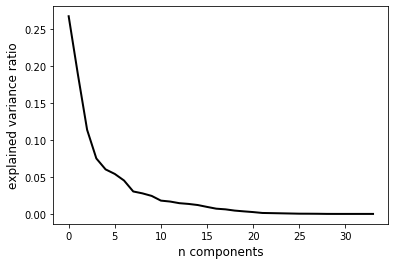

In [54]:
# explained_variance_，降维后的各主成分的方差值,方差值越大，越是重要的主成分。
#explained_variance_ratio_，降维后的各主成分的方差值占总方差值的比例，比例越大，越是重要的主成分。
pca=PCA()
pca.fit_transform(data)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_, 'k', linewidth=2)
plt.xlabel('n components', fontsize=12)
plt.ylabel('explained variance ratio', fontsize=12)
plt.savefig('explained_variance_ratio.jpg', dpi=300)
plt.show()

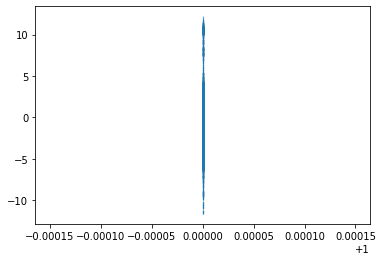

In [3]:
pca=PCA(n_components=1)
newData1=pca.fit_transform(data)
plt.scatter([1]*len(newData1),newData1,s=0.01)
plt.savefig("PCA_longitudinal_1d.png",dpi=400)

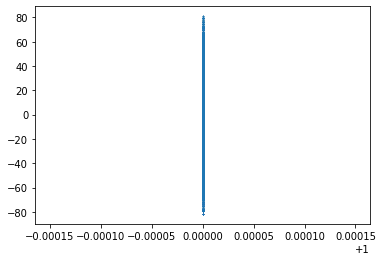

In [6]:
tsne=TSNE(n_components=1)
newData1=tsne.fit_transform(data)
plt.scatter([1]*len(newData1),newData1,s=0.01)
plt.savefig("TSNE_longitudinal_1d.png",dpi=400)

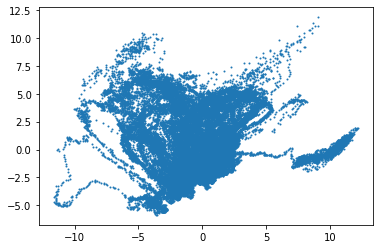

In [4]:
pca=PCA(n_components=2)
newData2=pca.fit_transform(data)
plt.scatter(newData2[:,0],newData2[:,1],s=1)
plt.savefig("PCA_longitudinal_2d.png",dpi=400)
plt.show()

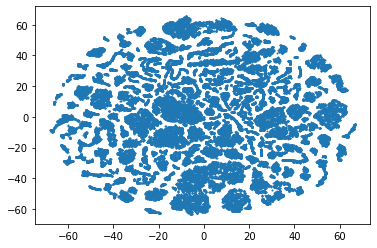

In [8]:
tsne=TSNE(n_components=2)
newData2=tsne.fit_transform(data)
plt.scatter(newData2[:,0],newData2[:,1],s=1)
plt.savefig("TSNE_longitudinal_2d.png",dpi=400)
plt.show()

/Users/sunchenxi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


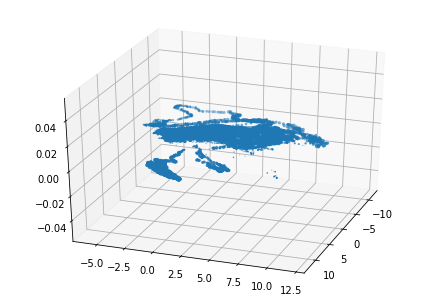

In [43]:
pca=PCA(n_components=3)
newData3=pca.fit_transform(data)
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(newData3[:, 0], newData3[:, 1], newData3[:, 2],marker='o')
plt.savefig("PCA_longitudinal_3d.png",dpi=400)

# 横向PCA，67249维->1,2,3

In [9]:
data_list=[]
column = ["全机油量","马赫数","气压高度","校准空速","真空速","升降速度","攻角","侧滑角","动压","法向过载","侧向过载","轴向过载","俯仰角","滚转角","航向角","滚转速率","俯仰速率","偏航速率","左鸭翼","右鸭翼","左前襟","右前襟","左外副翼","右外副翼","左内副翼","右内副翼","左方向舵","右方向舵","机翼剪力","机翼弯矩","鸭翼剪力","垂尾剪力","鸭翼弯矩","机身弯矩"]
for i in column:
    data_list.append(data[i].tolist())

[1.83608510e+04 1.27987041e+04 7.17088544e+03 5.02075795e+03
 3.94119847e+03 3.46141115e+03 3.04270356e+03 2.02904503e+03
 1.92543655e+03 1.68705529e+03 1.16000412e+03 1.05239532e+03
 9.95360068e+02 9.33972279e+02 6.60032025e+02 6.24375834e+02
 4.82482054e+02 4.19178763e+02 2.88390036e+02 1.75185322e+02
 1.21630005e+02 7.52061321e+01 7.37196587e+01 4.80184038e+01
 3.09550394e+01 1.94810135e+01 1.31452416e+01 2.21651112e+00
 3.67662012e-01 2.67690409e-01 1.44556443e-01 3.79164636e-02
 1.70459631e-02 6.71091863e-27]
[2.75627901e-01 1.92130525e-01 1.07647304e-01 7.53701981e-02
 5.91641565e-02 5.19617250e-02 4.56762052e-02 3.04594500e-02
 2.89041089e-02 2.53255968e-02 1.74136537e-02 1.57982608e-02
 1.49420638e-02 1.40205277e-02 9.90821405e-03 9.37295340e-03
 7.24288411e-03 6.29259302e-03 4.32922964e-03 2.62983250e-03
 1.82587523e-03 1.12897318e-03 1.10665866e-03 7.20838695e-04
 4.64688296e-04 2.92443464e-04 1.97332648e-04 3.32736379e-05
 5.51923812e-06 4.01849269e-06 2.17004043e-06 5.69191

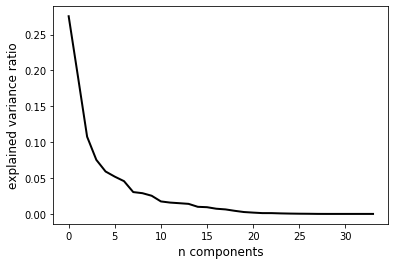

In [80]:
pca=PCA()
pca.fit_transform(data_list)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_, 'k', linewidth=2)
plt.xlabel('n components', fontsize=12)
plt.ylabel('explained variance ratio', fontsize=12)
plt.savefig('explained_variance_ratio2.jpg', dpi=300)
plt.show()

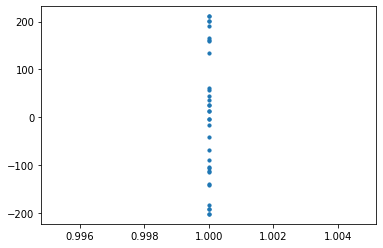

In [81]:
pca=PCA(n_components=1)
newData1=pca.fit_transform(data_list)
plt.scatter([1]*len(newData1),newData1,s=10)
plt.savefig("PCA_horizontal_1d.png",dpi=400)

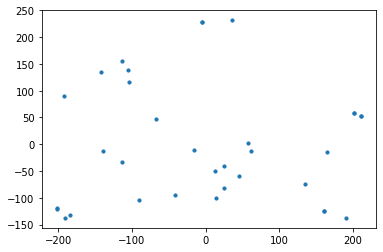

In [82]:
pca=PCA(n_components=2)
newData2=pca.fit_transform(data_list)
plt.scatter(newData2[:,0],newData2[:,1],s=10)
plt.savefig("PCA_horizontal_2d.png",dpi=400)
plt.show()

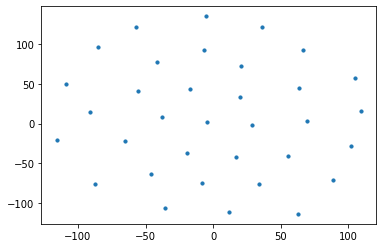

In [11]:
tsne=TSNE(n_components=2)
newData2=tsne.fit_transform(data_list)
plt.scatter(newData2[:,0],newData2[:,1],s=10)
plt.savefig("TSNE_horizontal_2d.png",dpi=400)
plt.show()

/Users/sunchenxi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


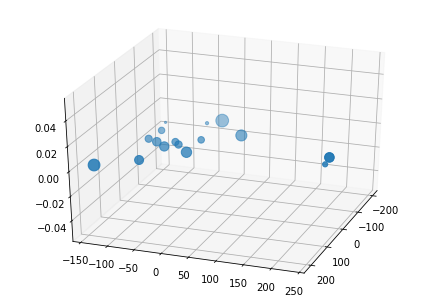

In [83]:
pca=PCA(n_components=3)
newData3=pca.fit_transform(data_list)
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(newData3[:, 0], newData3[:, 1], newData3[:, 2])
plt.savefig("PCA_horizontal_3d.png",dpi=400)

# P123_20190224_155414

In [10]:
# get data, drop last NAN column, extract first two raws.
columnName = ["时间","全机油量","武器重量","马赫数","气压高度","校准空速","真空速","升降速度","攻角","侧滑角","动压","法向过载","侧向过载","轴向过载","俯仰角","滚转角","航向角","滚转速率","俯仰速率","偏航速率","左鸭翼","右鸭翼","左前襟","右前襟","左外副翼","右外副翼","左内副翼","右内副翼","左方向舵","右方向舵","机翼剪力","机翼弯矩","鸭翼剪力","垂尾剪力","鸭翼弯矩","机身弯矩",'None']
data = pd.read_table('../../data/P123_20190224_155414.dat', sep=' ', encoding='utf-8',names=columnName)
data = data.drop(["时间", 'None'], axis=1)
# feature data
data = data.drop(index=[0,1]).reset_index(drop=True)
# 去掉武器重量
data = data.drop(["武器重量"], axis=1)

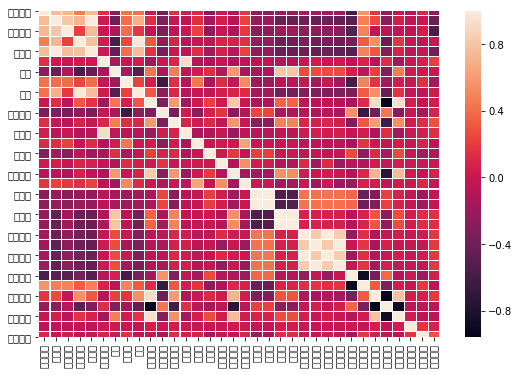

In [86]:
corr=data.corr(method='pearson')
f, ax= plt.subplots(figsize = (9, 6))
sns.heatmap(corr, linewidths = 0.05, ax = ax)
plt.savefig('features_corr_pearson.png',dpi=300)

[7.79201691e+00 6.26287390e+00 3.87797630e+00 3.33697771e+00
 2.32075794e+00 1.98525596e+00 1.50955127e+00 1.19027714e+00
 1.07260690e+00 8.47857937e-01 7.30317171e-01 6.09535451e-01
 4.97355917e-01 3.82993472e-01 2.92264816e-01 2.78821121e-01
 2.43911234e-01 2.11547654e-01 1.57798207e-01 1.28362732e-01
 9.63007842e-02 5.08147485e-02 3.55382327e-02 3.16796718e-02
 1.51858601e-02 1.36729098e-02 1.31366473e-02 1.00054584e-02
 4.22440023e-03 2.03480563e-04 1.21293978e-04 3.21548710e-05
 1.33858788e-05 1.12836781e-05]
[2.29176968e-01 1.84202173e-01 1.14058126e-01 9.81464032e-02
 6.82575862e-02 5.83898812e-02 4.43985667e-02 3.50081512e-02
 3.15472618e-02 2.49369981e-02 2.14799168e-02 1.79275132e-02
 1.46281152e-02 1.12645139e-02 8.59602398e-03 8.20062118e-03
 7.17385981e-03 6.22198983e-03 4.64112373e-03 3.77537446e-03
 2.83237600e-03 1.49455142e-03 1.04524214e-03 9.31755052e-04
 4.46642944e-04 4.02144404e-04 3.86371979e-04 2.94278187e-04
 1.24247065e-04 5.98472244e-06 3.56746992e-06 9.45731

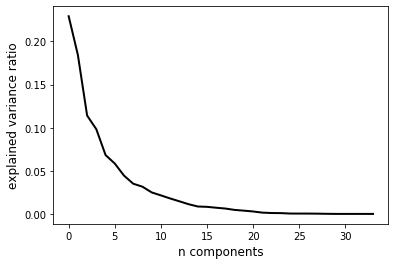

In [87]:
pca=PCA()
pca.fit_transform(data)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_, 'k', linewidth=2)
plt.xlabel('n components', fontsize=12)
plt.ylabel('explained variance ratio', fontsize=12)
plt.savefig('explained_variance_ratio.jpg', dpi=300)
plt.show()

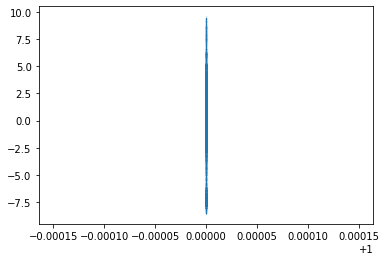

In [88]:
pca=PCA(n_components=1)
newData1=pca.fit_transform(data)
plt.scatter([1]*len(newData1),newData1,s=0.01)
plt.savefig("PCA_longitudinal_1d.png",dpi=400)

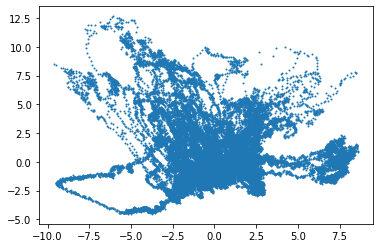

In [28]:
pca=PCA(n_components=2)
newData2=pca.fit_transform(data)
plt.scatter(-newData2[:,0],newData2[:,1],s=1)
plt.savefig("PCA_longitudinal_2d.png",dpi=400)
plt.show()

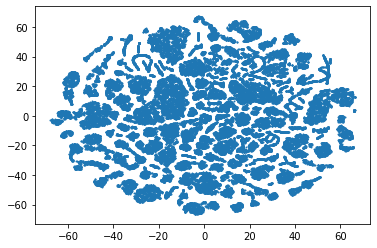

In [4]:
tsne=TSNE(n_components=2)
newData2=tsne.fit_transform(data)
plt.scatter(newData2[:,0],newData2[:,1],s=1)
plt.savefig("TSNE_longitudinal_2d.png",dpi=400)
plt.show()

/Users/sunchenxi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


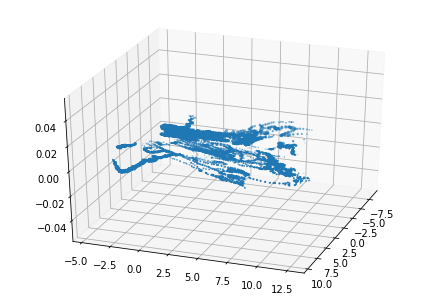

In [90]:
pca=PCA(n_components=3)
newData3=pca.fit_transform(data)
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(newData3[:, 0], newData3[:, 1], newData3[:, 2],marker='o')
plt.savefig("PCA_longitudinal_3d.png",dpi=400)

In [5]:
data_list=[]
column = ["全机油量","马赫数","气压高度","校准空速","真空速","升降速度","攻角","侧滑角","动压","法向过载","侧向过载","轴向过载","俯仰角","滚转角","航向角","滚转速率","俯仰速率","偏航速率","左鸭翼","右鸭翼","左前襟","右前襟","左外副翼","右外副翼","左内副翼","右内副翼","左方向舵","右方向舵","机翼剪力","机翼弯矩","鸭翼剪力","垂尾剪力","鸭翼弯矩","机身弯矩"]
for i in column:
    data_list.append(data[i].tolist())

[1.56171428e+04 1.19216583e+04 7.19671685e+03 6.48397522e+03
 4.70413405e+03 3.71091114e+03 2.79417640e+03 2.42373530e+03
 2.03199263e+03 1.72564652e+03 1.47541504e+03 1.04833174e+03
 9.98709963e+02 7.74930987e+02 5.86577735e+02 4.98037806e+02
 4.48274081e+02 4.19873170e+02 3.20604839e+02 2.36911775e+02
 1.28143059e+02 1.02871801e+02 6.59174189e+01 4.98298997e+01
 2.83459995e+01 2.69243138e+01 2.21885914e+01 8.83663124e+00
 4.59082461e-01 2.47755341e-01 6.59149439e-02 2.75852833e-02
 2.31508684e-02 1.76176556e-26]
[2.37156484e-01 1.81038144e-01 1.09286832e-01 9.84633862e-02
 7.14353389e-02 5.63526024e-02 4.24313882e-02 3.68059989e-02
 3.08571314e-02 2.62050662e-02 2.24051383e-02 1.59196002e-02
 1.51660612e-02 1.17678317e-02 8.90756490e-03 7.56302841e-03
 6.80733385e-03 6.37604752e-03 4.86859327e-03 3.59765958e-03
 1.94593580e-03 1.56217529e-03 1.00099893e-03 7.56699478e-04
 4.30452462e-04 4.08863239e-04 3.36948210e-04 1.34190000e-04
 6.97146614e-06 3.76232619e-06 1.00096135e-06 4.18900

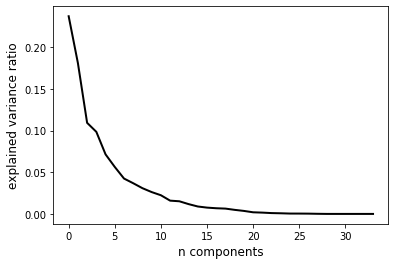

In [92]:
pca=PCA()
pca.fit_transform(data_list)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_, 'k', linewidth=2)
plt.xlabel('n components', fontsize=12)
plt.ylabel('explained variance ratio', fontsize=12)
plt.savefig('explained_variance_ratio2.jpg', dpi=300)
plt.show()

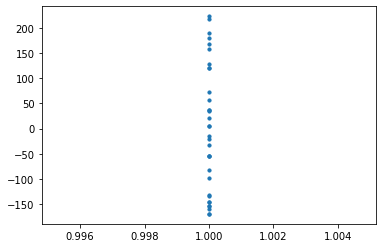

In [93]:
pca=PCA(n_components=1)
newData1=pca.fit_transform(data_list)
plt.scatter([1]*len(newData1),newData1,s=10)
plt.savefig("PCA_horizontal_1d.png",dpi=400)

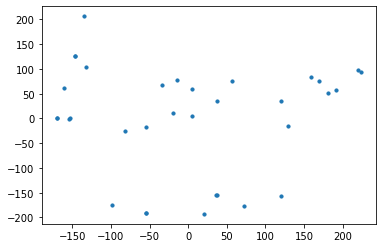

In [94]:
pca=PCA(n_components=2)
newData2=pca.fit_transform(data_list)
plt.scatter(newData2[:,0],newData2[:,1],s=10)
plt.savefig("PCA_horizontal_2d.png",dpi=400)
plt.show()

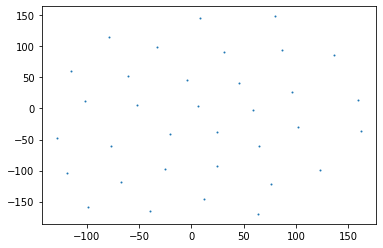

In [6]:
tsne=TSNE(n_components=2)
newData2=tsne.fit_transform(data_list)
plt.scatter(newData2[:,0],newData2[:,1],s=1)
plt.savefig("TSNE_horizontal_2d.png",dpi=400)
plt.show()

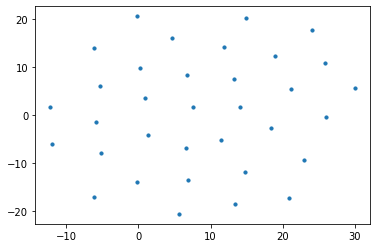

In [14]:
tsne=TSNE(n_components=2)
newData2=tsne.fit_transform(data_list)
plt.scatter(newData2[:,0],newData2[:,1],s=10)
plt.savefig("TSNE_horizontal_2d.png",dpi=400)
plt.show()

/Users/sunchenxi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


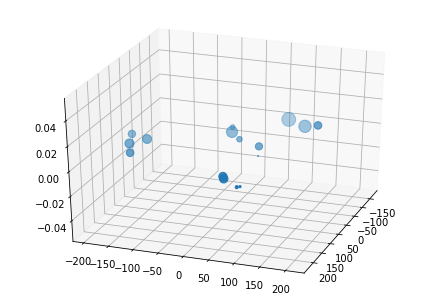

In [95]:
pca=PCA(n_components=3)
newData3=pca.fit_transform(data_list)
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(newData3[:, 0], newData3[:, 1], newData3[:, 2])
plt.savefig("PCA_horizontal_3d.png",dpi=400)

# P123_20190401_083526

In [35]:
# get data, drop last NAN column, extract first two raws.
columnName = ["时间","全机油量","武器重量","马赫数","气压高度","校准空速","真空速","升降速度","攻角","侧滑角","动压","法向过载","侧向过载","轴向过载","俯仰角","滚转角","航向角","滚转速率","俯仰速率","偏航速率","左鸭翼","右鸭翼","左前襟","右前襟","左外副翼","右外副翼","左内副翼","右内副翼","左方向舵","右方向舵","机翼剪力","机翼弯矩","鸭翼剪力","垂尾剪力","鸭翼弯矩","机身弯矩",'None']
data = pd.read_table('../../data/P123_20190401_083526.dat', sep=' ', encoding='utf-8',names=columnName)
data = data.drop(["时间", 'None'], axis=1)
# feature data
data = data.drop(index=[0,1]).reset_index(drop=True)
# 去掉武器重量
data = data.drop(["武器重量"], axis=1)

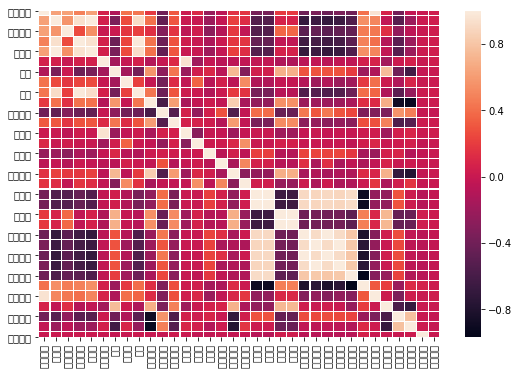

In [99]:
corr=data.corr(method='pearson')
f, ax= plt.subplots(figsize = (9, 6))
sns.heatmap(corr, linewidths = 0.05, ax = ax)
plt.savefig('features_corr_pearson.png',dpi=300)

[1.15098232e+01 5.85560635e+00 3.35311945e+00 2.34666409e+00
 1.89812619e+00 1.60392355e+00 1.27372278e+00 9.97314956e-01
 9.94738437e-01 8.86174607e-01 6.31058723e-01 5.88199126e-01
 5.14039250e-01 3.83930150e-01 3.00056791e-01 2.52238846e-01
 1.56366680e-01 1.27526850e-01 1.06835833e-01 5.82361791e-02
 4.64889702e-02 3.08827973e-02 2.40401973e-02 1.99955516e-02
 1.66356766e-02 1.26881040e-02 6.95732618e-03 3.67980299e-03
 6.38799977e-04 2.31956116e-04 2.38202637e-05 1.48776997e-05
 1.19655472e-05 8.09335670e-06]
[3.38524211e-01 1.72223716e-01 9.86211606e-02 6.90195322e-02
 5.58272410e-02 4.71742220e-02 3.74624347e-02 2.93327929e-02
 2.92570129e-02 2.60639591e-02 1.85605507e-02 1.72999743e-02
 1.51188015e-02 1.12920632e-02 8.82519976e-03 7.41878961e-03
 4.59902000e-03 3.75078971e-03 3.14223037e-03 1.71282880e-03
 1.36732265e-03 9.08317568e-04 7.07064628e-04 5.88104460e-04
 4.89284607e-04 3.73179530e-04 2.04627241e-04 1.08229500e-04
 1.87882347e-05 6.82223871e-06 7.00595992e-07 4.37579

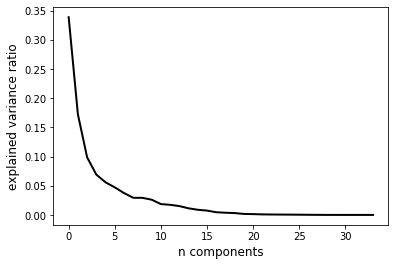

In [100]:
pca=PCA()
pca.fit_transform(data)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_, 'k', linewidth=2)
plt.xlabel('n components', fontsize=12)
plt.ylabel('explained variance ratio', fontsize=12)
plt.savefig('explained_variance_ratio.jpg', dpi=300)
plt.show()

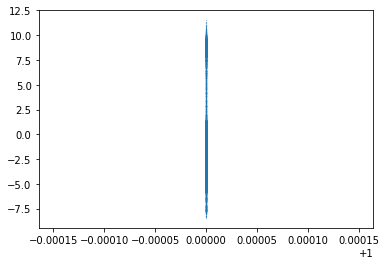

In [101]:
pca=PCA(n_components=1)
newData1=pca.fit_transform(data)
plt.scatter([1]*len(newData1),newData1,s=0.01)
plt.savefig("PCA_longitudinal_1d.png",dpi=400)

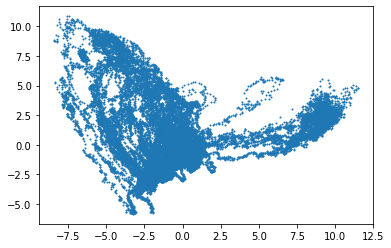

In [102]:
pca=PCA(n_components=2)
newData2=pca.fit_transform(data)
plt.scatter(newData2[:,0],newData2[:,1],s=1)
plt.savefig("PCA_longitudinal_2d.png",dpi=400)
plt.show()

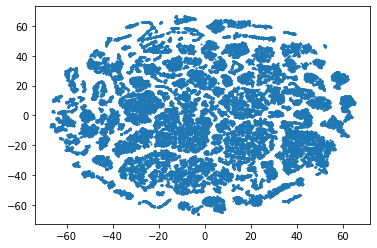

In [36]:
tsne=TSNE(n_components=2)
newData2=tsne.fit_transform(data)
plt.scatter(newData2[:,0],newData2[:,1],s=1)
plt.savefig("TSNE_longitudinal_2d.png",dpi=400)
plt.show()

/Users/sunchenxi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


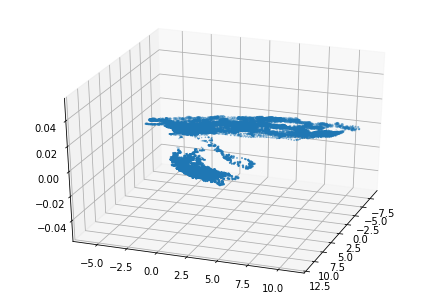

In [103]:
pca=PCA(n_components=3)
newData3=pca.fit_transform(data)
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(newData3[:, 0], newData3[:, 1], newData3[:, 2],marker='o')
plt.savefig("PCA_longitudinal_3d.png",dpi=400)

In [31]:
data_list=[]
column = ["全机油量","马赫数","气压高度","校准空速","真空速","升降速度","攻角","侧滑角","动压","法向过载","侧向过载","轴向过载","俯仰角","滚转角","航向角","滚转速率","俯仰速率","偏航速率","左鸭翼","右鸭翼","左前襟","右前襟","左外副翼","右外副翼","左内副翼","右内副翼","左方向舵","右方向舵","机翼剪力","机翼弯矩","鸭翼剪力","垂尾剪力","鸭翼弯矩","机身弯矩"]
for i in column:
    data_list.append(data[i].tolist())

[2.25093990e+04 1.12287491e+04 5.96219115e+03 4.51888264e+03
 3.35459757e+03 2.94117020e+03 2.48042003e+03 1.95304666e+03
 1.88340306e+03 1.56845119e+03 1.15889183e+03 1.13505399e+03
 9.43562886e+02 7.15220280e+02 5.11541856e+02 3.81991902e+02
 2.49980424e+02 2.10541621e+02 1.68906397e+02 1.13458748e+02
 8.59713743e+01 5.16329454e+01 4.03358298e+01 3.84201339e+01
 2.57599614e+01 2.33323296e+01 7.24158998e+00 1.37308001e+00
 4.57901955e-01 4.79148540e-02 2.92189471e-02 2.34536947e-02
 1.58710455e-02 7.60247642e-27]
[3.50263962e-01 1.74728172e-01 9.27763860e-02 7.03173698e-02
 5.22001780e-02 4.57669227e-02 3.85972875e-02 3.03909429e-02
 2.93072337e-02 2.44063348e-02 1.80332687e-02 1.76623333e-02
 1.46825810e-02 1.11293904e-02 7.95999382e-03 5.94409458e-03
 3.88989211e-03 3.27619330e-03 2.62831645e-03 1.76550740e-03
 1.33778223e-03 8.03449261e-04 6.27657252e-04 5.97847517e-04
 4.00845271e-04 3.63069409e-04 1.12684839e-04 2.13662055e-05
 7.12531474e-06 7.45592833e-07 4.54669809e-07 3.64957

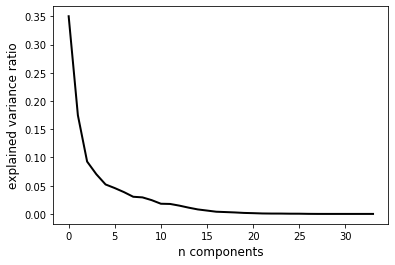

In [105]:
pca=PCA()
pca.fit_transform(data_list)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_, 'k', linewidth=2)
plt.xlabel('n components', fontsize=12)
plt.ylabel('explained variance ratio', fontsize=12)
plt.savefig('explained_variance_ratio2.jpg', dpi=300)
plt.show()

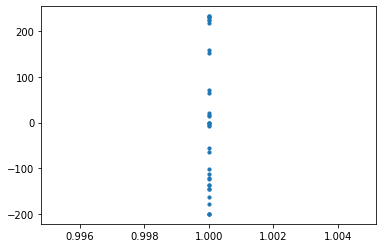

In [106]:
pca=PCA(n_components=1)
newData1=pca.fit_transform(data_list)
plt.scatter([1]*len(newData1),newData1,s=10)
plt.savefig("PCA_horizontal_1d.png",dpi=400)

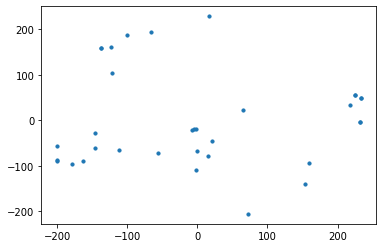

In [19]:
pca=PCA(n_components=2)
newData2=pca.fit_transform(data_list)
plt.scatter(newData2[:,0],newData2[:,1],s=10)
plt.savefig("PCA_horizontal_2d.png",dpi=400)
plt.show()

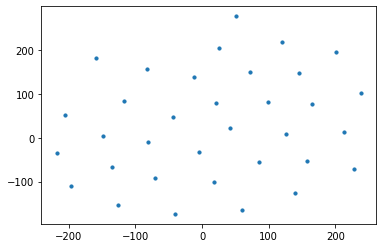

In [21]:
tsne=TSNE(n_components=2)
newData2=tsne.fit_transform(data_list)
plt.scatter(newData2[:,0],newData2[:,1],s=10)
plt.savefig("TSNE_horizontal_2d.png",dpi=400)
plt.show()

/Users/sunchenxi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


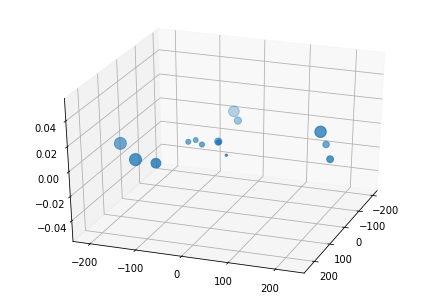

In [108]:
pca=PCA(n_components=3)
newData3=pca.fit_transform(data_list)
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(newData3[:, 0], newData3[:, 1], newData3[:, 2])
plt.savefig("PCA_horizontal_3d.png",dpi=400)

# P124_20190401_085640

In [32]:
# get data, drop last NAN column, extract first two raws.
columnName = ["时间","全机油量","武器重量","马赫数","气压高度","校准空速","真空速","升降速度","攻角","侧滑角","动压","法向过载","侧向过载","轴向过载","俯仰角","滚转角","航向角","滚转速率","俯仰速率","偏航速率","左鸭翼","右鸭翼","左前襟","右前襟","左外副翼","右外副翼","左内副翼","右内副翼","左方向舵","右方向舵","机翼剪力","机翼弯矩","鸭翼剪力","垂尾剪力","鸭翼弯矩","机身弯矩",'None']
data = pd.read_table('../../data/P124_20190401_085640.dat', sep=' ', encoding='utf-8',names=columnName)
data = data.drop(["时间", 'None'], axis=1)
# feature data
data = data.drop(index=[0,1]).reset_index(drop=True)
# 去掉武器重量
data = data.drop(["武器重量"], axis=1)

/Users/sunchenxi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sunchenxi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26426 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sunchenxi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 27833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sunchenxi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sunchenxi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 39532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sunchenxi/opt/anaconda3/lib/python3.7/

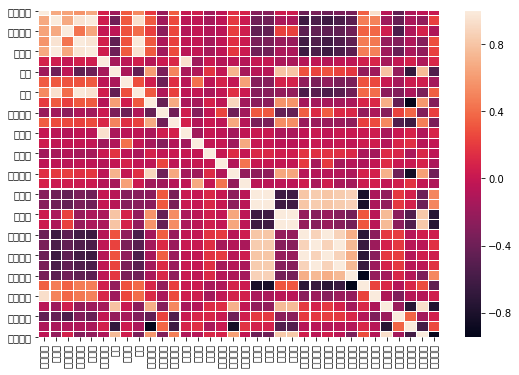

In [193]:
corr=data.corr(method='pearson')
f, ax= plt.subplots(figsize = (9, 6))
sns.heatmap(corr, linewidths = 0.05, ax = ax)
plt.savefig('features_corr_pearson.png',dpi=300)

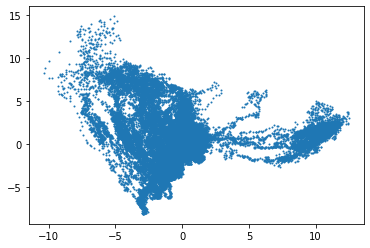

In [194]:
pca=PCA(n_components=2)
newData2=pca.fit_transform(data)
plt.scatter(newData2[:,0],newData2[:,1],s=1)
plt.savefig("PCA_longitudinal_2d.png",dpi=400)
plt.show()

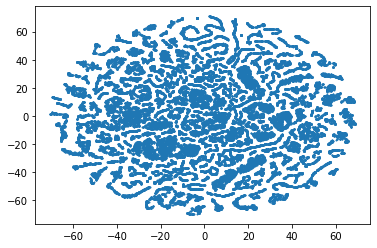

In [33]:
tsne=TSNE(n_components=2)
newData2=tsne.fit_transform(data)
plt.scatter(newData2[:,0],newData2[:,1],s=1)
plt.savefig("TSNE_longitudinal_2d.png",dpi=400)
plt.show()

# 平均特征相关性

# 与飞机的关系

In [56]:
# get data, drop last NAN column, extract first two raws.
data = pd.read_table('../../data/P123_20190224_133916.dat', sep=' ', encoding='utf-8',header=None)
data = data.drop(labels=36, axis=1)
data = data.drop(labels=0, axis=1)
# feature data
data = data.drop(index=[0,1]).reset_index(drop=True)
corr_ini = data.corr(method='pearson')
corr_ini.loc[:,:] = 0
corr_P123=corr_ini
corr_P124=corr_ini
corr_P125=corr_ini
corr_P126=corr_ini
corr_P127=corr_ini

In [155]:
in_file='../../data/'
listfile=os.listdir('../../data')
plane=['P123','P124','P125','P126','P127']
for p in plane:
    n=0
    corrsum=corr_ini
    for i in listfile:
        n=n+1
        if i.startswith(p):
            data = pd.read_table(in_file+i, sep=' ', encoding='gbk',header=None)
            data = data.drop(labels=36, axis=1)
            data = data.drop(labels=0, axis=1)
            data = data.drop(index=[0,1]).reset_index(drop=True)
            corr=data.corr(method='pearson')
            corr.fillna(0, inplace=True)
            corrsum=corrsum+corr
    corr_avg=corrsum/n
    if (p==plane[0]):
        corr_P123=corr_avg
    elif p==plane[1]:
        corr_P124=corr_avg
    elif p==plane[2]:
        corr_P125=corr_avg
    elif p==plane[3]:
        corr_P126=corr_avg
    elif p==plane[4]:
        corr_P127=corr_avg
        

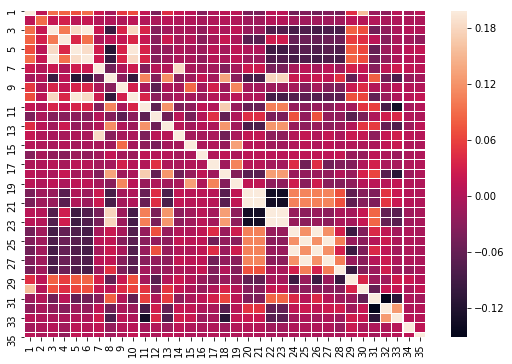

In [64]:
f, ax= plt.subplots(figsize = (9, 6))
sns.heatmap(corr_P123, linewidths = 0.05, ax = ax)
plt.savefig('features_corr_P123.png',dpi=300)

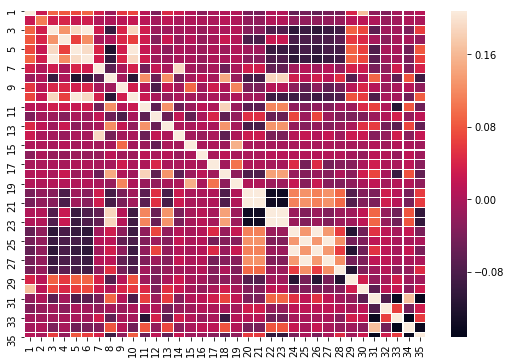

In [63]:
f, ax= plt.subplots(figsize = (9, 6))
sns.heatmap(corr_P124, linewidths = 0.05, ax = ax)
plt.savefig('features_corr_P124.png',dpi=300)

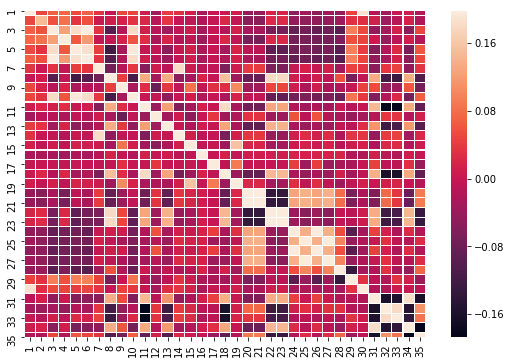

In [65]:
f, ax= plt.subplots(figsize = (9, 6))
sns.heatmap(corr_P125, linewidths = 0.05, ax = ax)
plt.savefig('features_corr_P125.png',dpi=300)

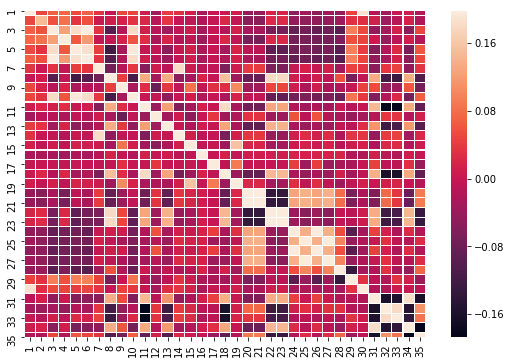

In [66]:
f, ax= plt.subplots(figsize = (9, 6))
sns.heatmap(corr_P125, linewidths = 0.05, ax = ax)
plt.savefig('features_corr_P126.png',dpi=300)

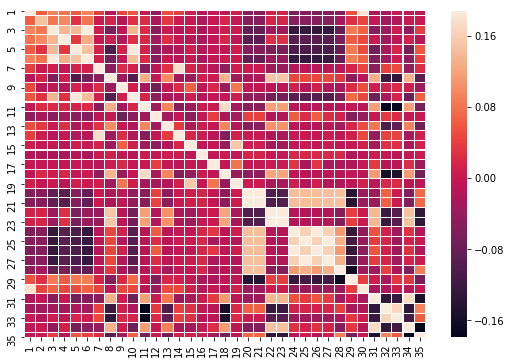

In [67]:
f, ax= plt.subplots(figsize = (9, 6))
sns.heatmap(corr_P127, linewidths = 0.05, ax = ax)
plt.savefig('features_corr_P127.png',dpi=300)

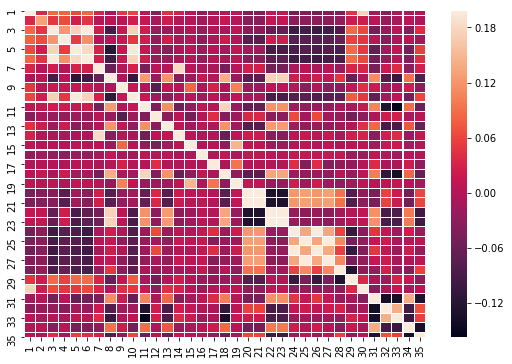

In [68]:
f, ax= plt.subplots(figsize = (9, 6))
sns.heatmap((corr_P127+corr_P126+corr_P125+corr_P124+corr_P123)/5, linewidths = 0.05, ax = ax)
plt.savefig('features_corr_avg.png',dpi=300)

In [176]:
features_corr_avg_plane=[corr_P123,corr_P124,corr_P125,corr_P126,corr_P127]

In [158]:
features_corr_avg=(corr_P127+corr_P126+corr_P125+corr_P124+corr_P123)/5
df=features_corr_avg
for i in df.columns:
    df[i][df[i] == df[i].max()]=0

In [148]:
ind=[]
for i in df.columns:
    ind.append(columnName[df[df[i] == df[i].max()].index.tolist()[0]])

In [149]:
ind

['机翼剪力',
 '气压高度',
 '真空速',
 '马赫数',
 '动压',
 '马赫数',
 '俯仰角',
 '右前襟',
 '偏航速率',
 '校准空速',
 '俯仰速率',
 '左外副翼',
 '左前襟',
 '升降速度',
 '偏航速率',
 '左方向舵',
 '偏航速率',
 '法向过载',
 '滚转角',
 '右鸭翼',
 '左鸭翼',
 '右前襟',
 '左前襟',
 '左内副翼',
 '右内副翼',
 '左外副翼',
 '右外副翼',
 '右外副翼',
 '真空速',
 '全机油量',
 '鸭翼弯矩',
 '垂尾剪力',
 '鸭翼剪力',
 '机翼弯矩',
 '鸭翼剪力']

# 与日期的关系

In [81]:
listfile=os.listdir('../../data')
date=[]
for i in listfile:
    if i.startswith('P'):
        sp=i.split('_')
        date.append(sp[1])
date = list(set(date))        

In [89]:
date

['20190418',
 '20190308',
 '20190330',
 '20190225',
 '20190909',
 '20190425',
 '20190426',
 '20190424',
 '20190402',
 '20190322',
 '20190516',
 '20190303',
 '20190219',
 '20190917',
 '20190329',
 '20190325',
 '20190925',
 '20190326',
 '20190315',
 '20190919',
 '20190307',
 '20190224',
 '20190319',
 '20190908',
 '20190920',
 '20190408',
 '20190510',
 '20190924',
 '20190314',
 '20190912',
 '20190507',
 '20190401',
 '20190415',
 '20190419']

In [84]:
len(date)

34

In [88]:
corr_avg_date=[]
for d in date:
    n=0
    corrsum=corr_ini
    for i in listfile:
        n=n+1
        sp=i.split('_')
        if sp[1]==d:
            data = pd.read_table(in_file+i, sep=' ', encoding='gbk',header=None)
            data = data.drop(labels=36, axis=1)
            data = data.drop(labels=0, axis=1)
            data = data.drop(index=[0,1]).reset_index(drop=True)
            corr=data.corr(method='pearson')
            corr.fillna(0, inplace=True)
            corrsum=corrsum+corr
    corr_avg=corrsum/n
    corr_avg_date.append(corr_avg)

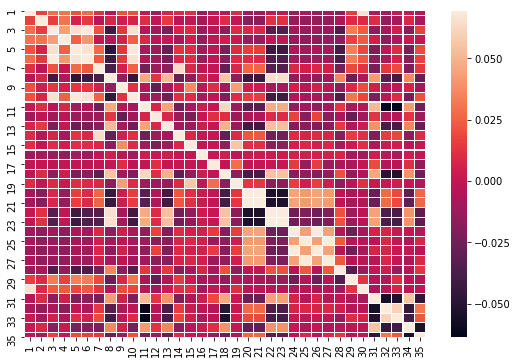

In [95]:
f, ax= plt.subplots(figsize = (9, 6))
sns.heatmap(corr_avg_date[0], linewidths = 0.05, ax = ax)
plt.savefig('features_corr_avg_20190418.png',dpi=300)

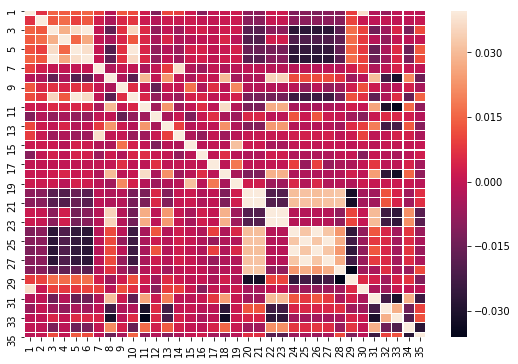

In [94]:
f, ax= plt.subplots(figsize = (9, 6))
sns.heatmap(corr_avg_date[2], linewidths = 0.05, ax = ax)
plt.savefig('features_corr_avg_20190330.png',dpi=300)

In [180]:
var1=[]
for i in range(1,36):
    for j in range(1,36):
        value=[]
        for df in corr_avg_date:
            value.append(df[i][j])
        var1.append(np.std(value))

In [181]:
np.mean(var1)

0.005744120467531378

In [184]:
var=[]
for i in range(1,36):
    for j in range(1,36):
        value=[]
        for df in features_corr_avg_plane:
            value.append(df[i][j])
        var.append(np.std(value))

In [185]:
np.mean(var)

0.012482879772056369

# 对TSNE的结果进行聚类

In [39]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import sklearn.metrics as metrics

In [60]:
len(newData2)

64682

In [101]:
db = DBSCAN(eps=0.5, min_samples=10).fit(newData2)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [102]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"% metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels,average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f" %metrics.silhouette_score(newData2, labels))

Estimated number of clusters: 1269
Estimated number of noise points: 7495
Silhouette Coefficient: 0.306


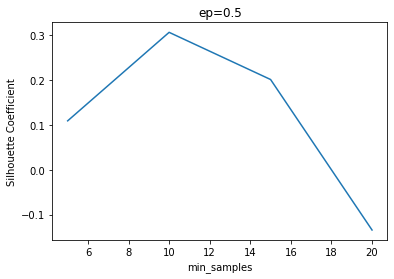

In [106]:
#ep=0.5
x=[5,10,15,20]
y=[0.109,0.306,0.201,-0.134]
#min_samples=10
x2=[0.3,0.4,0.5,0.6,0.7]
y2=[0.207,0.318,0.306,0.210,0.105]

plt.plot(x,y)
plt.xlabel("min_samples")
plt.ylabel("Silhouette Coefficient")
plt.title('ep=0.5')
plt.savefig('silhouette_coef_DBSCAN1.png',dpi=300)


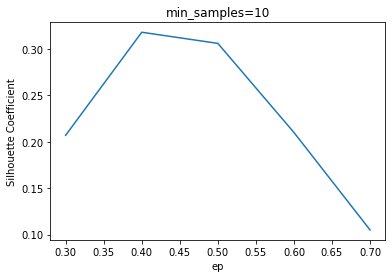

In [107]:
plt.plot(x2,y2)
plt.xlabel("ep")
plt.ylabel("Silhouette Coefficient")
plt.title('min_samples=10')
plt.savefig('silhouette_coef_DBSCAN2.png',dpi=300)

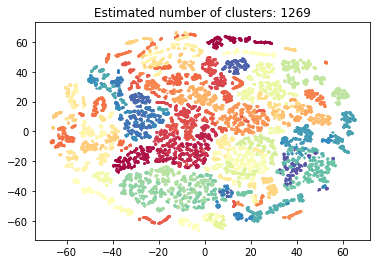

In [130]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = newData2[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', c=tuple(col), markersize=1)
#     xy = newData2[class_member_mask & ~core_samples_mask]
#     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markersize=10)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.savefig('clusters_DBSCAN.png',dpi=300)
plt.show()

In [133]:
ch=[]
for i in [100,200,300,400,500,600,700,800,900,1000]:
    kmeans_model = KMeans(n_clusters=i, random_state=1).fit(newData2)
    labels = kmeans_model.labels_
    ch.append(metrics.calinski_harabaz_score(newData2, labels))

/Users/sunchenxi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sunchenxi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sunchenxi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sunchenxi/opt/a

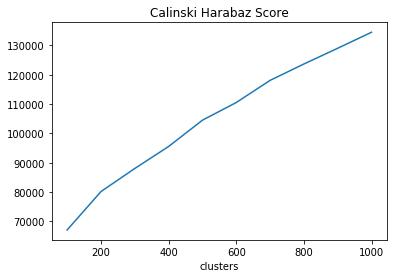

In [148]:
clusters=[100,200,300,400,500,600,700,800,900,1000]
plt.plot(clusters)
plt.xlabel("clusters")
plt.title("Calinski Harabaz Score")
plt.savefig('CH_KMEANS.png',dpi=300)

In [135]:
ch2=[]
for i in [10,20,30,40,50,60,70,80,90]:
    kmeans_model = KMeans(n_clusters=i, random_state=1).fit(newData2)
    labels = kmeans_model.labels_
    ch2.append(metrics.calinski_harabaz_score(newData2, labels))

/Users/sunchenxi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sunchenxi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sunchenxi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sunchenxi/opt/a

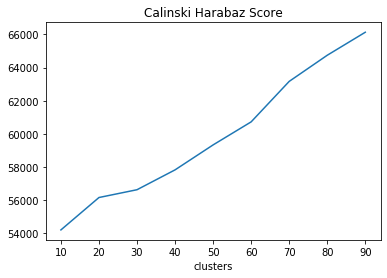

In [150]:
clusters=[10,20,30,40,50,60,70,80,90]
plt.plot(clusters,ch2[:9])
plt.xlabel("clusters")
plt.title("Calinski Harabaz Score")
plt.savefig('CH_KMEANS2.png',dpi=300)

In [140]:
ch3=[]
clusters=[2,3,4,5,6,7,8,9]
for i in clusters:
    kmeans_model= KMeans(n_clusters=i, random_state=1).fit(newData2)
    labels = kmeans_model.labels_
    ch3.append(metrics.calinski_harabaz_score(newData2, labels))

/Users/sunchenxi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sunchenxi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sunchenxi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sunchenxi/opt/a

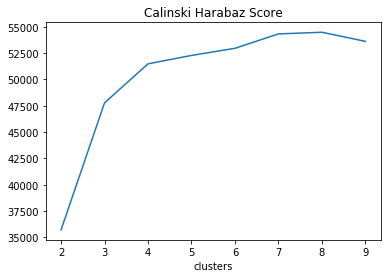

In [151]:
clusters=[2,3,4,5,6,7,8,9]
plt.plot(clusters,ch3)
plt.xlabel("clusters")
plt.title("Calinski Harabaz Score")
plt.savefig('CH_KMEANS3.png',dpi=300)

In [146]:
kmeans_model = KMeans(n_clusters=1000, random_state=1).fit(newData2)
labels = kmeans_model.labels_
metrics.calinski_harabaz_score(newData2, labels)

/Users/sunchenxi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


134506.56623868263

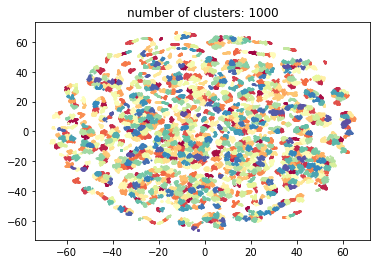

In [157]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = newData2[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', c=tuple(col), markersize=1)
#     xy = newData2[class_member_mask & ~core_samples_mask]
#     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markersize=10)
plt.title('number of clusters: %d' % 1000)
plt.savefig('clusters_KMEANS.png',dpi=300)
plt.show()

In [156]:
len(colors)

1000